In [1]:
import gtfs2nx as gx

path = "./data/gtfs/gtfs_fp2024_2023-09-27_04-15.zip"

G = gx.transit_graph(
    path, time_window=("06:00", "08:00"), frac=0.1, walk_transfer_max_distance=0
)

2024-11-14 20:48:04,571 | INFO | STEP 1/5 - Loading GTFS feed(s) ...
2024-11-14 20:49:20,354 | INFO | STEP 2/5 - Preprocessing GTFS feeds ...


C:\Users\Gloria\PycharmProjects\reliable-travel-planning\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Gloria\PycharmProjects\reliable-travel-planning\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


2024-11-14 20:49:48,655 | INFO |            Filtering transit service between 06:00 and 08:00...
2024-11-14 20:49:49,361 | INFO | Removed 11018 trips with contradictory stop sequence and departure times.
2024-11-14 20:50:45,356 | INFO | Removed 79 trips with unrealistic travel speeds (>108km/h).
2024-11-14 20:50:45,805 | ERROR | Unrealistic trips left after stop times cleaning.
2024-11-14 20:50:47,355 | INFO | STEP 3/5 - Determining service frequency, transfer waiting & travel times...
2024-11-14 20:53:01,614 | INFO |            Sampling 10.0% of all transit routes...
2024-11-14 20:53:01,732 | INFO | STEP 4/5 - Creating NetworkX graph...
2024-11-14 20:53:01,972 | INFO | STEP 5/5 - Adding edges for walk transfers between stops no more than 0 m apart (assuming walk speed of 4 km/h)...


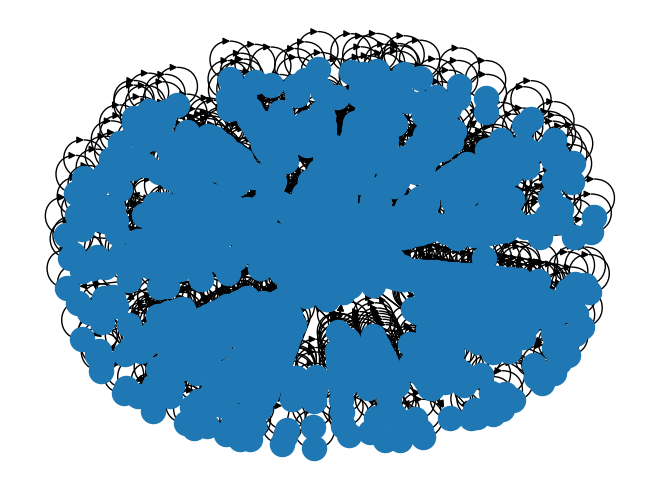

In [2]:
import networkx as nx

nx.draw(G)

In [3]:
G.edges(data=True)

OutEdgeDataView([('1300082@@92-439-j24-1', '1300082@@92-439-j24-1', {'weight': 0.0, 'mode': 'transit'}), ('1300082@@92-439-j24-1', '8591573@@92-439-j24-1', {'weight': 60.0, 'mode': 'transit'}), ('8591573@@92-439-j24-1', '8579029@@92-439-j24-1', {'weight': 180.0, 'mode': 'transit'}), ('8591573@@92-439-j24-1', '8591573@@92-439-j24-1', {'weight': 0.0, 'mode': 'transit'}), ('1300240@@92-439-j24-1', '1300082@@92-439-j24-1', {'weight': 60.0, 'mode': 'transit'}), ('1300240@@92-439-j24-1', '1300240@@92-439-j24-1', {'weight': 0.0, 'mode': 'transit'}), ('1401335@@92-14-D-j24-1', '1401335@@92-14-D-j24-1', {'weight': 0.0, 'mode': 'transit'}), ('1401335@@92-14-D-j24-1', '1401359@@92-14-D-j24-1', {'weight': 240.0, 'mode': 'transit'}), ('1401359@@92-14-D-j24-1', '1401359@@92-14-D-j24-1', {'weight': 0.0, 'mode': 'transit'}), ('1401359@@92-14-D-j24-1', '1401504@@92-14-D-j24-1', {'weight': 420.0, 'mode': 'transit'}), ('1401504@@92-14-D-j24-1', '1401504@@92-14-D-j24-1', {'weight': 0.0, 'mode': 'transit'}

In [5]:
G.nodes(data=True)

NodeDataView({'1300082@@92-439-j24-1': {'y': 5090249.2381960945, 'x': 497678.501039216, 'headway': 240.0, 'frequency': 1.0, 'route_id': '92-439-j24-1', 'route_type': 700, 'route_short_name': '439'}, '8591573@@92-439-j24-1': {'y': 5089799.71226288, 'x': 497564.17731942947, 'headway': 116.12903225806451, 'frequency': 1.0, 'route_id': '92-439-j24-1', 'route_type': 700, 'route_short_name': '439'}, '1300240@@92-439-j24-1': {'y': 5090768.130952438, 'x': 497718.3656332325, 'headway': 240.0, 'frequency': 1.0, 'route_id': '92-439-j24-1', 'route_type': 700, 'route_short_name': '439'}, '1401335@@92-14-D-j24-1': {'y': 5266271.982154529, 'x': 386828.05020565237, 'headway': 0.0, 'frequency': 0.5, 'route_id': '92-14-D-j24-1', 'route_type': 700, 'route_short_name': '14'}, '1401359@@92-14-D-j24-1': {'y': 5268617.517455534, 'x': 389264.47066961747, 'headway': 0.0, 'frequency': 0.5, 'route_id': '92-14-D-j24-1', 'route_type': 700, 'route_short_name': '14'}, '1401504@@92-14-D-j24-1': {'y': 5270694.24862015

In [4]:
selected_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d["mode"] == "transit"]
selected_edges

[('1300082@@92-439-j24-1',
  '1300082@@92-439-j24-1',
  {'weight': 0.0, 'mode': 'transit'}),
 ('1300082@@92-439-j24-1',
  '8591573@@92-439-j24-1',
  {'weight': 60.0, 'mode': 'transit'}),
 ('8591573@@92-439-j24-1',
  '8579029@@92-439-j24-1',
  {'weight': 180.0, 'mode': 'transit'}),
 ('8591573@@92-439-j24-1',
  '8591573@@92-439-j24-1',
  {'weight': 0.0, 'mode': 'transit'}),
 ('1300240@@92-439-j24-1',
  '1300082@@92-439-j24-1',
  {'weight': 60.0, 'mode': 'transit'}),
 ('1300240@@92-439-j24-1',
  '1300240@@92-439-j24-1',
  {'weight': 0.0, 'mode': 'transit'}),
 ('1401335@@92-14-D-j24-1',
  '1401335@@92-14-D-j24-1',
  {'weight': 0.0, 'mode': 'transit'}),
 ('1401335@@92-14-D-j24-1',
  '1401359@@92-14-D-j24-1',
  {'weight': 240.0, 'mode': 'transit'}),
 ('1401359@@92-14-D-j24-1',
  '1401359@@92-14-D-j24-1',
  {'weight': 0.0, 'mode': 'transit'}),
 ('1401359@@92-14-D-j24-1',
  '1401504@@92-14-D-j24-1',
  {'weight': 420.0, 'mode': 'transit'}),
 ('1401504@@92-14-D-j24-1',
  '1401504@@92-14-D-j24-1'

In [ ]:
# Find the shortest path from node A to node E
path = nx.shortest_path(G, "A", "E", weight="weight")
print(path)